In [127]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [128]:
# reading the copper dataset as pandas dataframe

data = pd.read_csv(r"/Users/gokul/My Apple/vs_code_practice/copper_model/Copper_Set.csv")
df = pd.DataFrame(data)
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [129]:
df.shape

(181673, 14)

### Data Prep

#### Handling Missing values

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [131]:
# number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [132]:
#missing values

missing_values = df.isna().sum()
print(missing_values)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [133]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [134]:
# correcting all the numerical data format

df['item_date'] = pd.to_datetime(df['item_date'], format = '%Y%m%d', errors= 'coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format = '%Y%m%d', errors= 'coerce')

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors= 'coerce')
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [135]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [136]:
df.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [137]:
# Some wrong values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [141]:
#nan values after correcting the wrong format

print(df.shape)
print('-'*25)

missing_values = df.isnull().sum()
print(missing_values)
print('-'*25)

# df.info()

(181673, 14)
-------------------------
id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64
-------------------------


In [142]:
# material ref have more than 55% are null values and all are unique values in id. so dropping both the columns.

df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [143]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [144]:
# quantity and selling price has negative values. so we convert to null for negative values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <= 0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [145]:
print(df.shape)
print('-'*20)

missing_values = df.isnull().sum()
print(missing_values)

(181673, 12)
--------------------
item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64


In [147]:
# deleting the remaining null values as they are less than 1% of data which can be neglected

df = df.dropna()

missing_values = df.isnull().sum()
print(missing_values)

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [148]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [149]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [150]:
# convert categorical data into numerical using map and ordinal encoder

df['status'] = df['status'].map({'Lost': 0, 'Won': 1, 'Draft': 2, 'To be approved': 3, 'Not lost for AM': 4,
                                 'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8})

df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.783299,30200854.0,25.0,1,5.0,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181668,2020-07-02,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,2020-07-01,619.00


In [151]:
# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [152]:
# final verification of null values after encoding
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [153]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181622,2020-11-26 23:02:12.050081792,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181622.0,5876.531676,0.00001,10.968784,30.364016,67.162076,1000000000.0,2349404.566764
customer,181622.0,30232507.561199,12458.0,30196884.0,30205242.0,30280416.0,30408185.0,100564.617021
country,181622.0,44.893818,25.0,26.0,30.0,78.0,113.0,24.404481
status,181622.0,1.316564,0.0,1.0,1.0,1.0,8.0,1.330333
item type,181622.0,4.133205,0.0,3.0,5.0,5.0,6.0,1.055218
application,181622.0,25.615669,2.0,10.0,15.0,41.0,99.0,17.753967
thickness,181622.0,2.550493,0.18,0.7,1.5,3.0,400.0,2.976505
width,181622.0,1295.266003,1.0,1179.0,1250.0,1500.0,2990.0,261.65154
product_ref,181622.0,474015230.216747,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717533572.155176


### Skewness Handling

In [154]:
# find skewness using boxplot, hist plot & violin plot

def plot(df, column):
    plt.figure(figsize= (20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data= df, x= column)
    plt.title(f'Box plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data= df, x= column, kde= True, bins= 50)
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data= df, x= column)
    plt.title(f'violin plot for {column}')

    plt.show

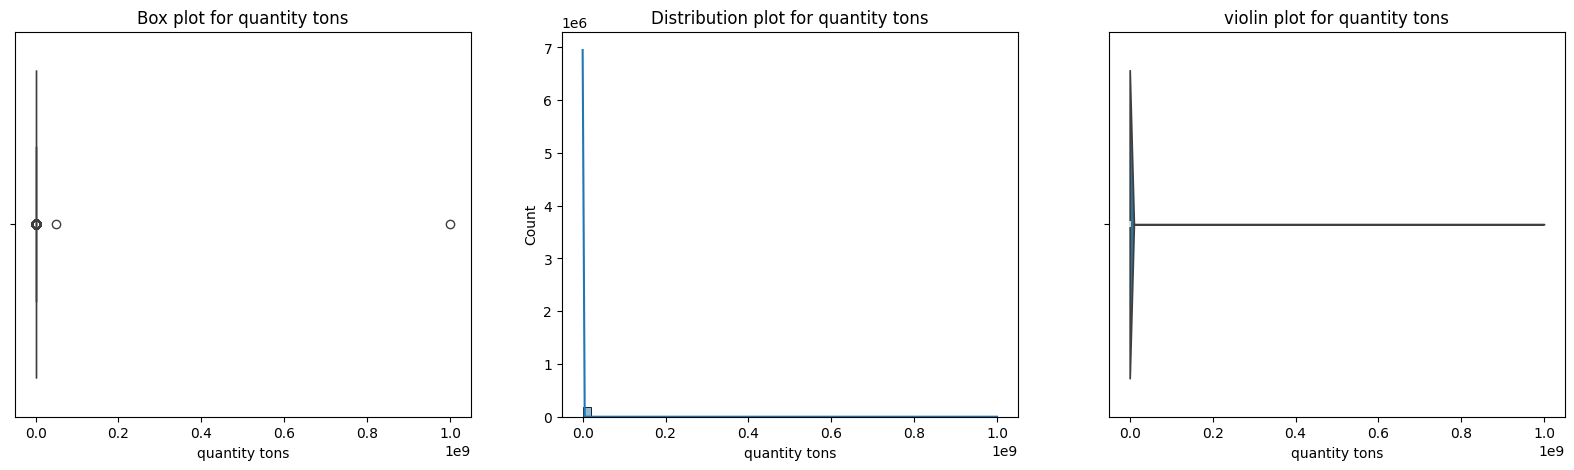

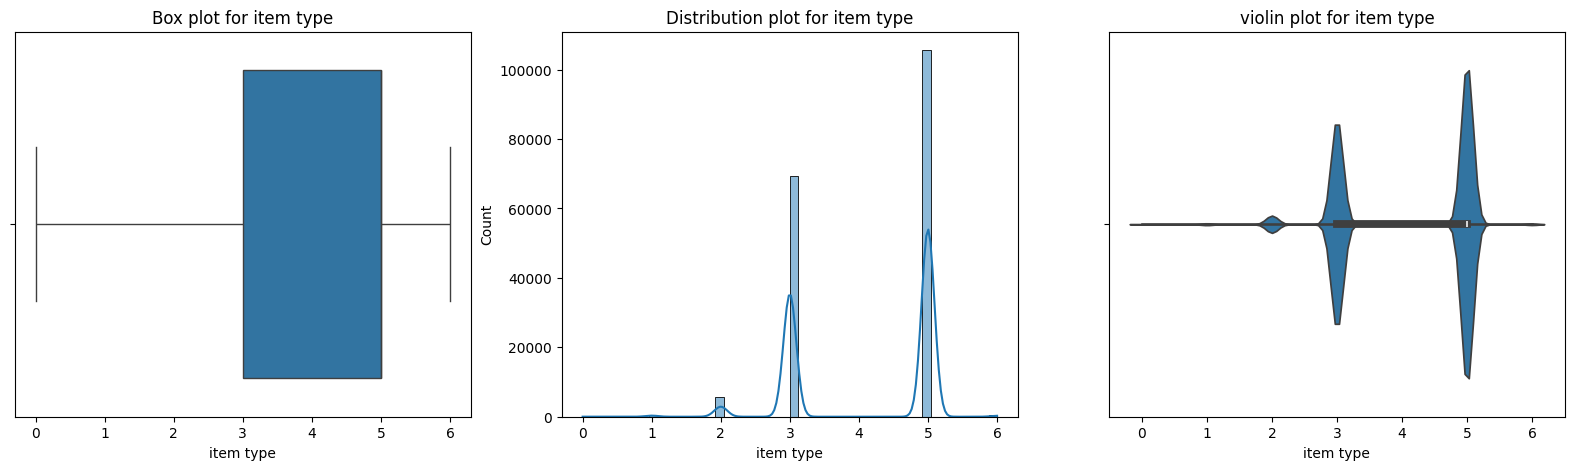

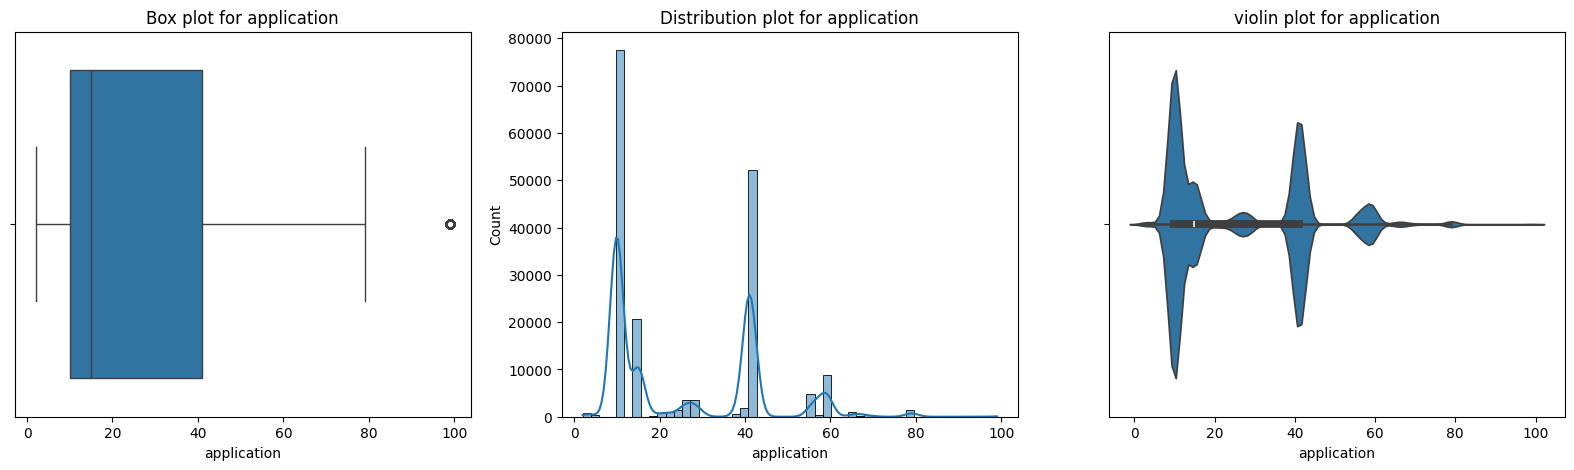

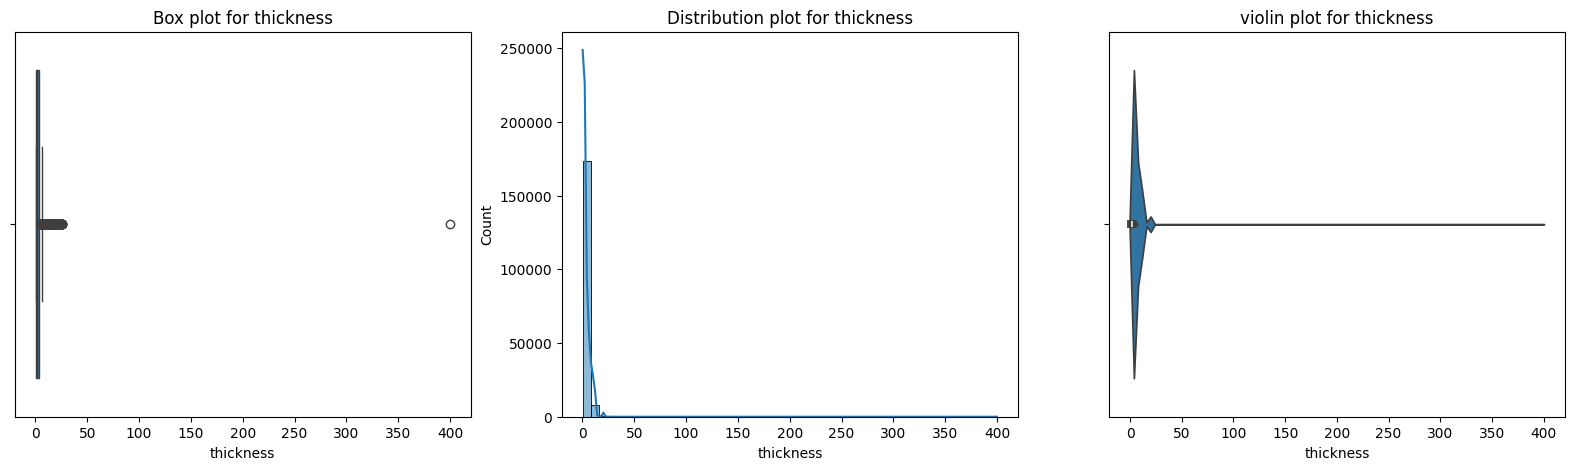

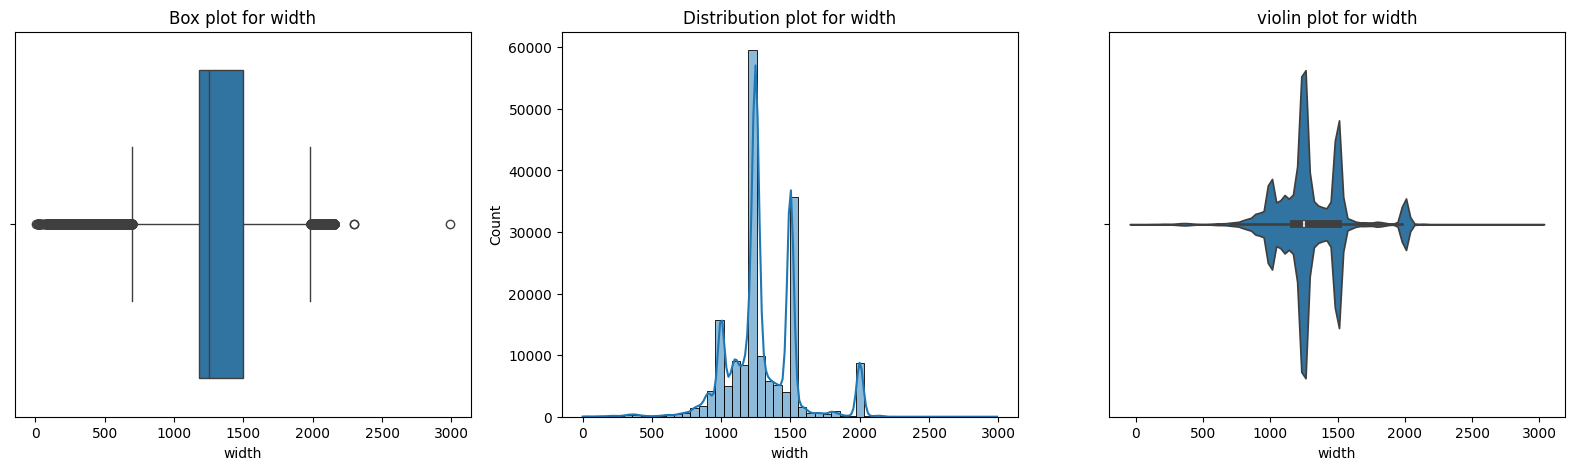

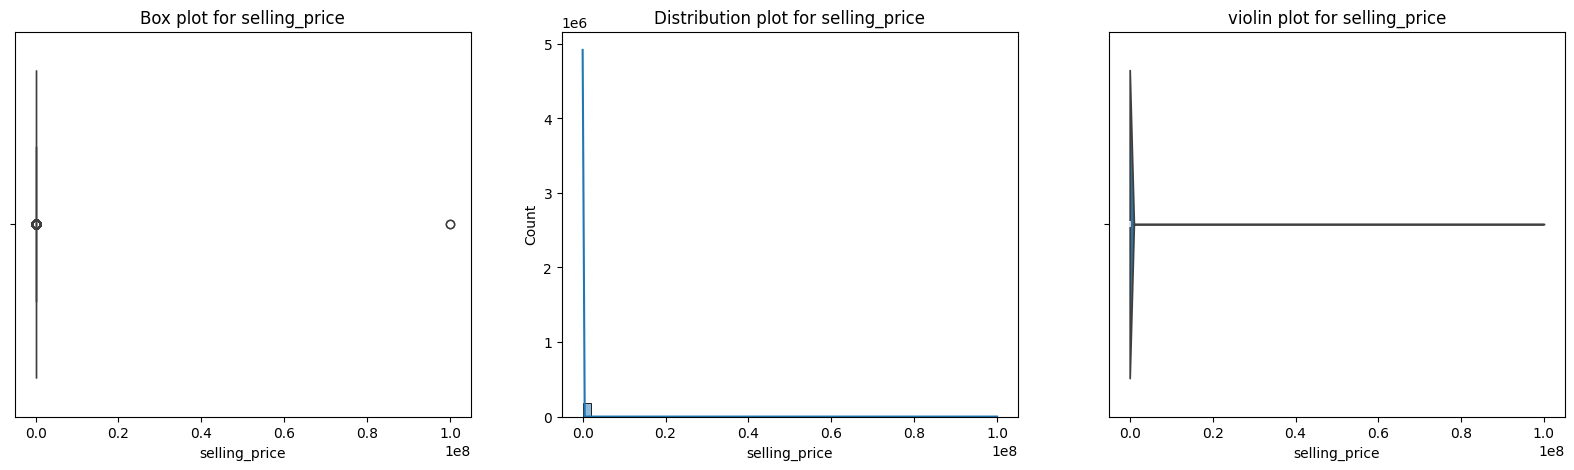

In [155]:
for i in ['quantity tons', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [156]:
# quantity tons, thickness and selling price are skewed
#using the log transformation to distribute the data

df1 = df.copy()

df1['quantity tons log'] = np.log(df1['quantity tons'])
df1['thickness log'] = np.log(df1['thickness'])
df1['selling price log'] = np.log(df1['selling_price'])

df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons log,thickness log,selling price log
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.783299,30200854.0,25.0,1,5.0,41.0,0.96,1240.0,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257
181668,2020-07-02,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,2020-07-02,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,2020-07-02,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105


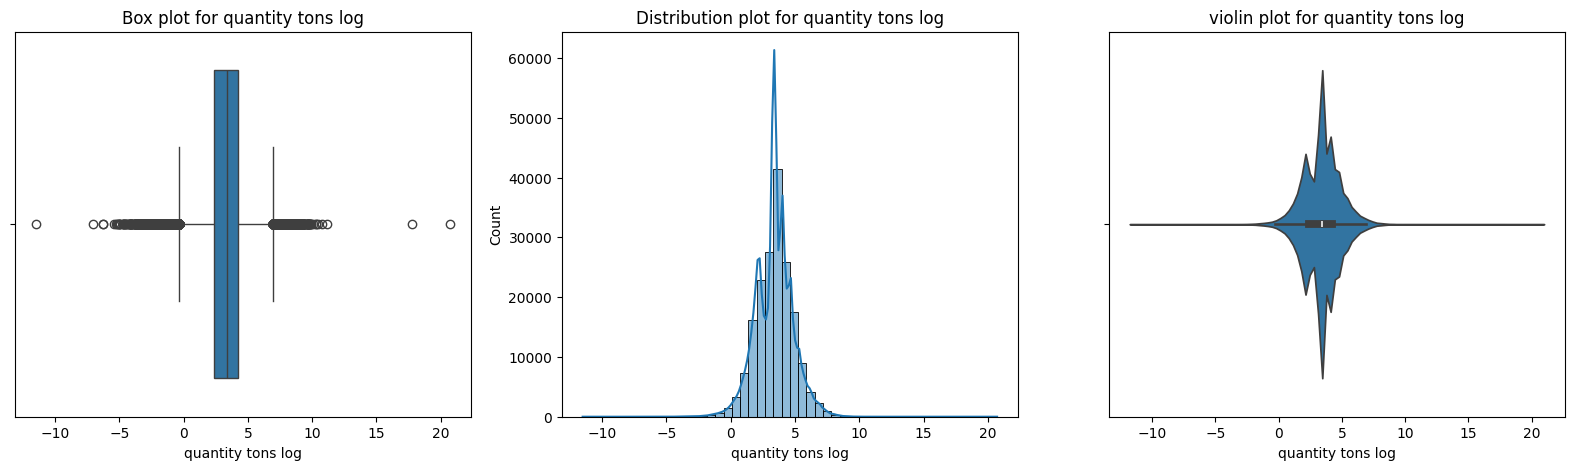

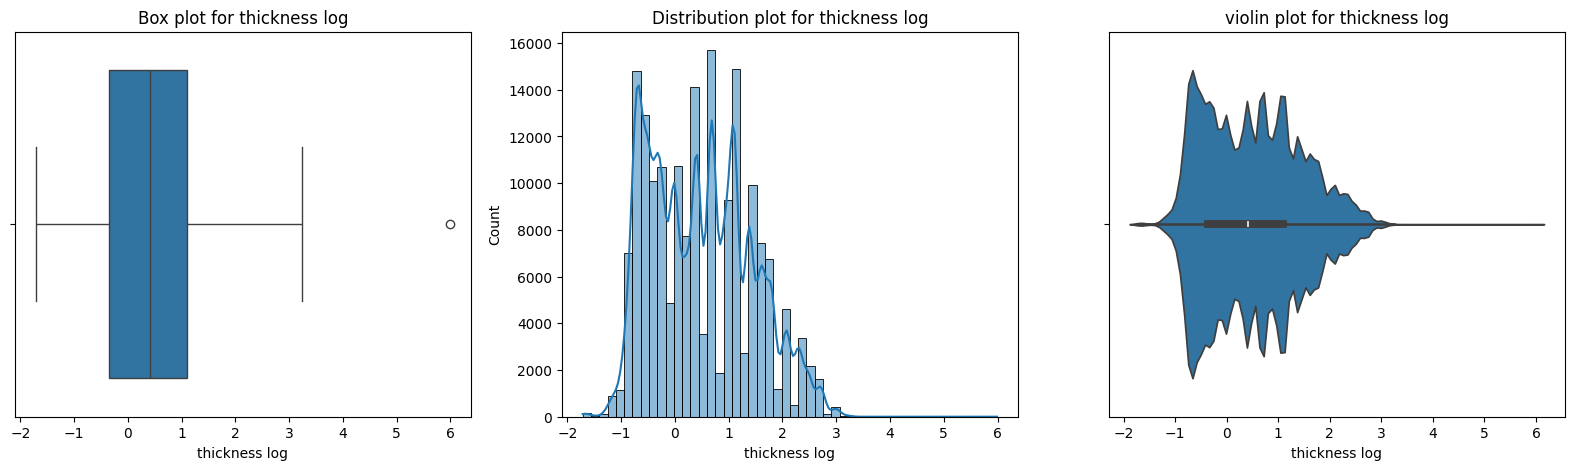

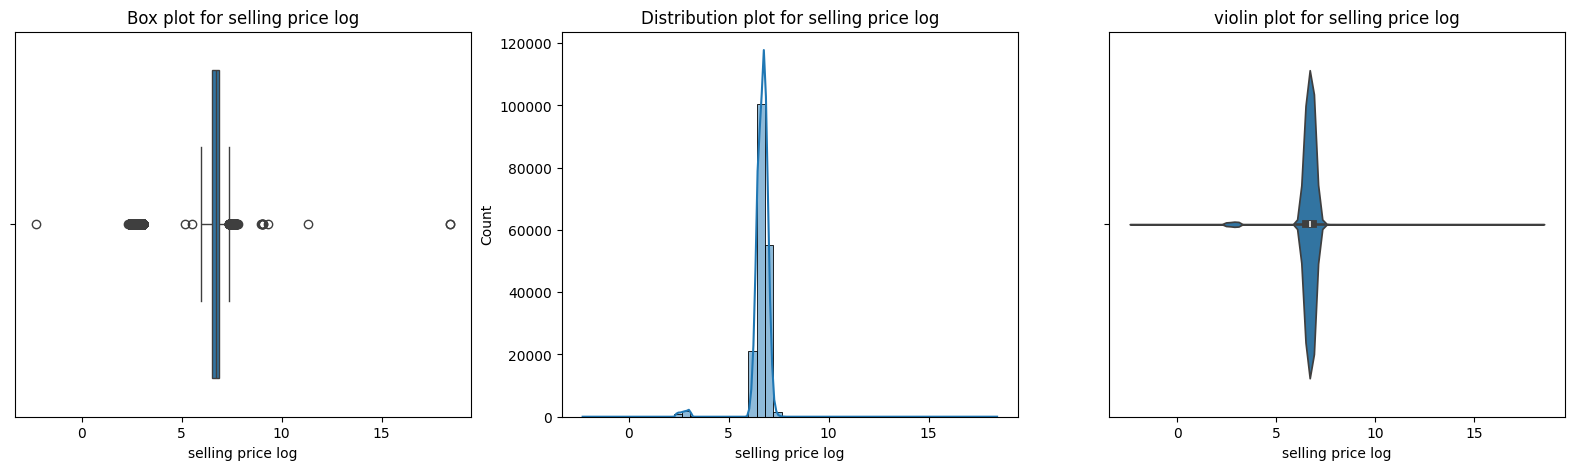

In [157]:
# after log transformation

for i in ['quantity tons log', 'thickness log', 'selling price log']:
    plot(df1, i)

After log transformation, the data is normally distributed now

### Outliers Handling - IQR Method

In [158]:
df2 = df1.copy()

In [159]:
import numpy as np

def treat_outliers(column):
  for i in column:
    iqr = np.percentile(df2[i],75) - np.percentile(df2[i],25)  # Q3 - Q1
    lower_bound =  np.percentile(df2[i],25) - (1.5 * iqr)
    upper_bound = np.percentile(df2[i],75) + (1.5 * iqr)
    df2[i] = df2[i].clip(lower_bound,upper_bound)
  print('Done !!!!')

treat_outliers(['quantity tons log','thickness log','width','selling price log'])

Done !!!!


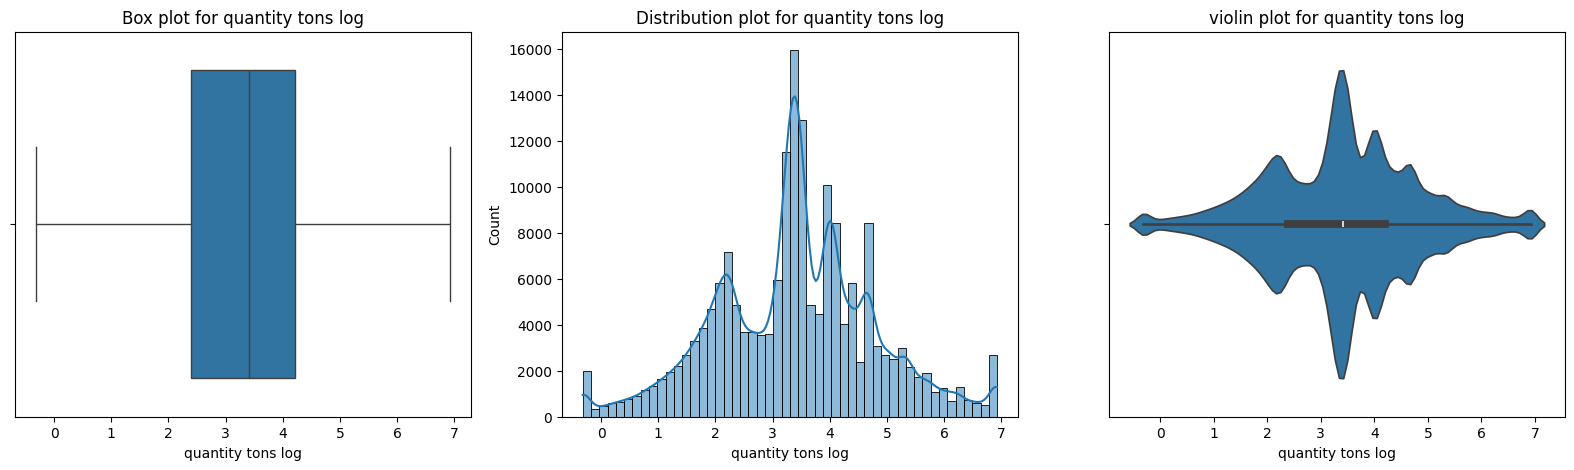

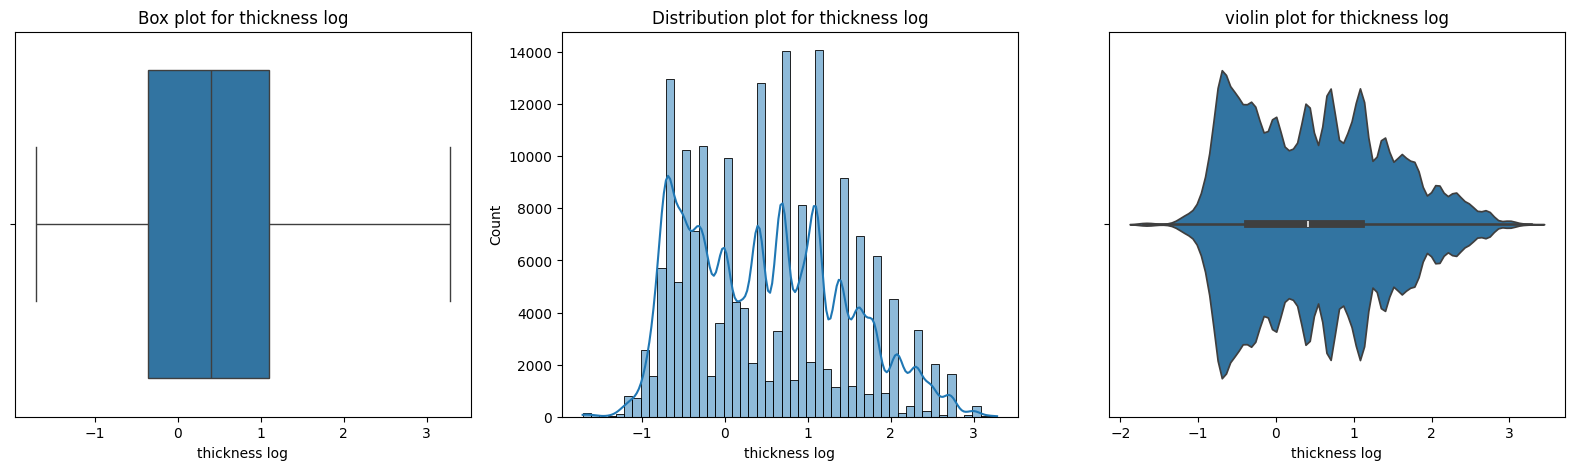

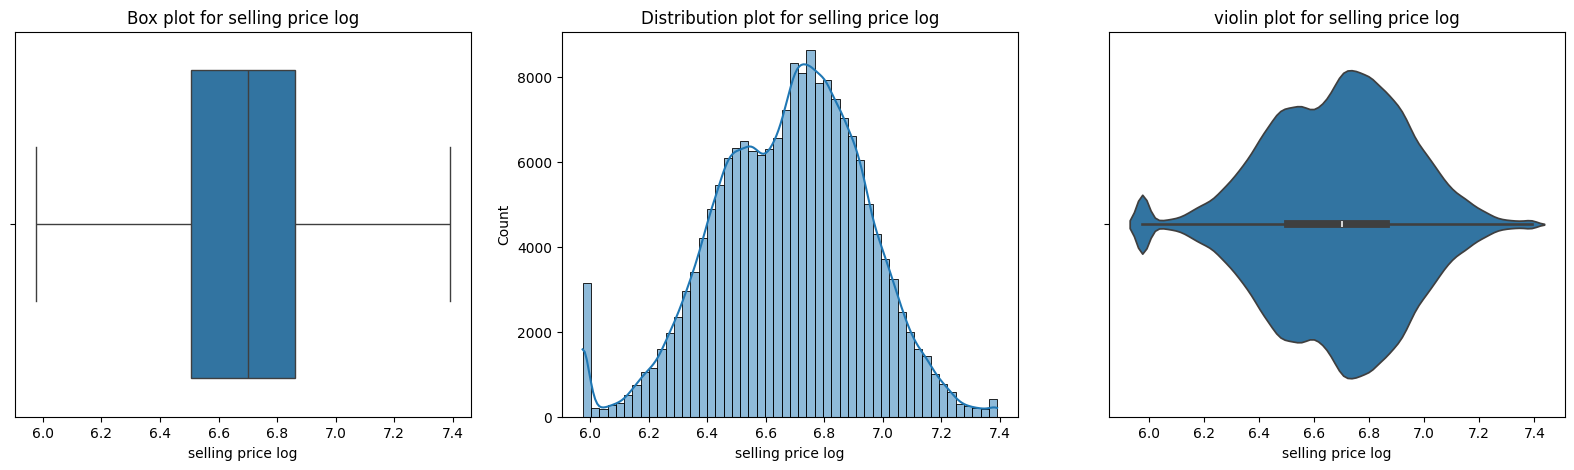

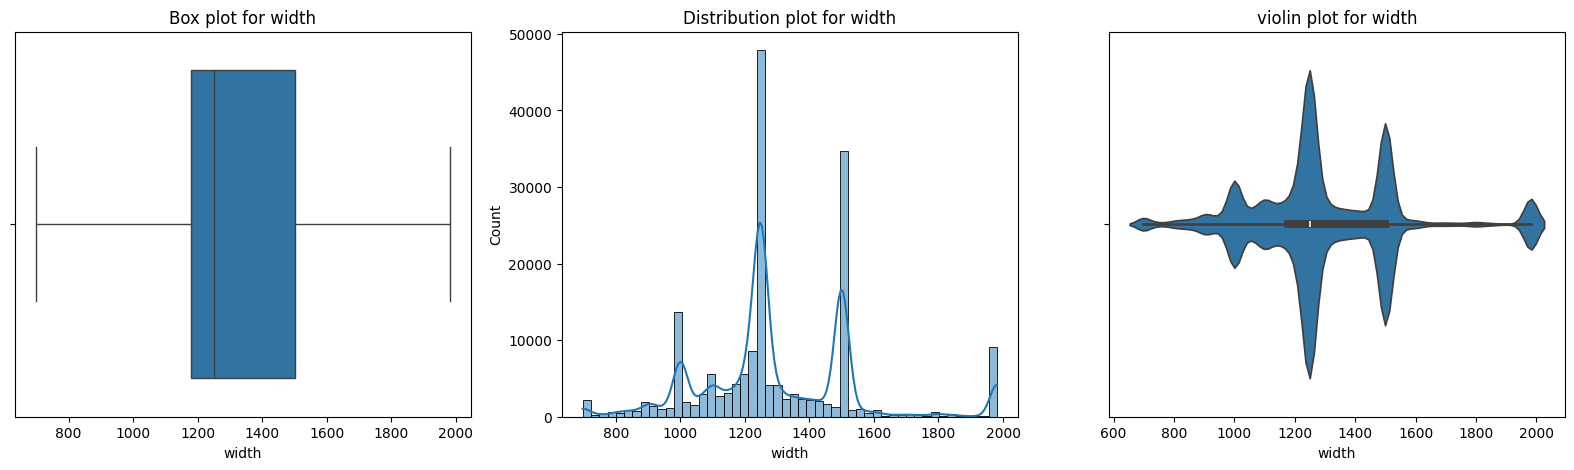

In [160]:
# after transforming the outliers data to within range

for i in ['quantity tons log', 'thickness log', 'selling price log', 'width']:
    plot(df2, i)

Outliers has been handled, and data distributed normally

In [161]:
# dropping the old columns of quantity tons, thickness and selling price

df3 = df2.drop(columns= ['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log
0,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-07-01,4.670802,-0.040822,6.400257
181668,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105


<Axes: >

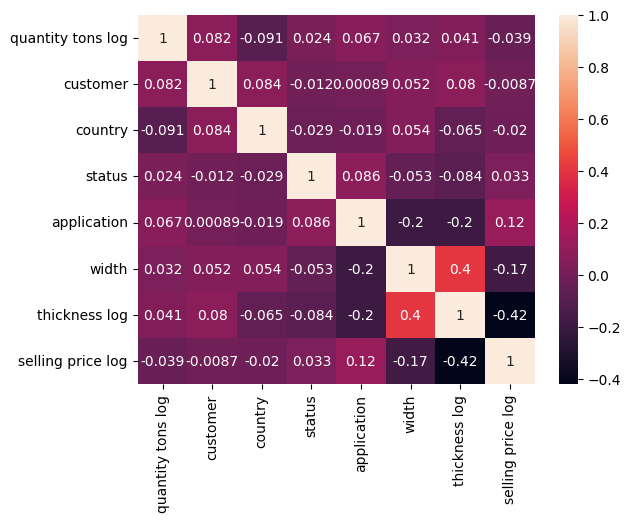

In [162]:
# checking columns correlation using heatmap

col = ['quantity tons log', 'customer', 'country', 'status', 'application', 'width', 'thickness log', 'selling price log']
heatmap = df3[col].corr()
sns.heatmap(heatmap, annot= True)

The highest and lowest values are 0.4 and -0.42(which is not >= 0.7)
So there is no need to drop any columns.

### Wrong delivery date handling

In [163]:
df4 = df3.copy()

In [164]:
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log
0,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-07-01,4.670802,-0.040822,6.400257
181668,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816
181669,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426
181670,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105


In [165]:
# some Delivery dates are before the item date, which is wrong

In [167]:
#finding the diff bw delivery date and item date and adding a new column of that

df4['date difference'] = (df4['delivery date'] - df4['item_date']).dt.days
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference
0,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,91
1,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0
2,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211,-90
3,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90
4,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-03-01,6.666354,1.386294,6.357842,-31


In [168]:
# convert the data type using pandas
df4['item_date'] = pd.to_datetime(df4['item_date'])

#splitting the day, month and year of item date column into separate columns

df4['item_date_day'] = df4['item_date'].dt.day
df4['item_date_month'] = df4['item_date'].dt.month
df4['item_date_year'] = df4['item_date'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-07-01,4.670802,-0.040822,6.400257,-1,2,7,2020
181668,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020


In [169]:
# splitting the non-negative, correct values of date difference to separate dataframe

df_cr = df4[df4['date difference'] >= 0 ]

df_cr = df_cr.reset_index(drop= True)  # reset index
df_cr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,2021-04-01,30209509.0,30.0,2,5.0,41.0,1125.0,611993,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,2021-04-01,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165512,2020-07-02,30227718.0,25.0,0,3.0,15.0,1981.5,640665,2020-08-01,3.472467,1.791759,6.313548,30,2,7,2020
165513,2020-07-02,30161559.0,30.0,0,3.0,10.0,1525.0,640665,2020-08-01,4.196171,1.348073,6.126869,30,2,7,2020
165514,2020-07-02,30161559.0,30.0,0,3.0,10.0,1525.0,640665,2020-08-01,4.156686,1.766442,6.124683,30,2,7,2020
165515,2020-07-02,30161559.0,30.0,0,3.0,10.0,1500.0,640665,2020-08-01,4.025862,2.060514,6.126869,30,2,7,2020


In [170]:
# splitting the negative, wrong values of date difference to separate dataframe

df_wr = df4[df4['date difference'] < 0 ]

df_wr = df_wr.reset_index(drop= True)  # reset index
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
3,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-07-01,4.670802,-0.040822,6.400257,-1,2,7,2020
16101,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
16102,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
16103,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020


In [171]:
# 16105 values of 'delivery date' are lesser than 'item date'.

In [172]:
# training the ML model with correct data frame to predict the correct delivery dates

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [173]:
df_cr.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date',
       'quantity tons log', 'thickness log', 'selling price log',
       'date difference', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [176]:
# using random forest regressor algorithm to train the model

def ml_date_diff():

    # training the model by using correct delivery date dataframe (df_cr)
    x = df_cr.drop(columns= ['item_date', 'delivery date', 'date difference'], axis= 1)
    y = df_cr['date difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    #predicitng the correct date difference of df_wr dataframe using model

    y_pred_list = []

    for index, row in df_wr.iterrows():
        input_data = row.drop(['item_date', 'delivery date', 'date difference'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [177]:
date_difference = ml_date_diff()

In [178]:
# print(date_difference)

In [179]:
#converting float values into integer

date_difference_1 = [int(round(i,0)) for i in date_difference]

In [180]:
# date_difference_1

In [181]:
# replacing the date difference column in df_wr dataframe

df_wr['date difference'] = pd.DataFrame(date_difference_1)
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-01-01,5.956169,-0.967584,6.468211,68,1,4,2021
1,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-01-01,5.310301,0.832909,6.643790,120,1,4,2021
2,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-03-01,6.666354,1.386294,6.357842,90,1,4,2021
3,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,2021-01-01,4.730808,-0.385662,6.836259,112,1,4,2021
4,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,2021-01-01,4.736160,-0.597837,6.860664,112,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-07-01,4.670802,-0.040822,6.400257,35,2,7,2020
16101,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-07-01,4.629691,-0.040822,6.381816,35,2,7,2020
16102,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-07-01,5.337954,-0.051293,6.378426,36,2,7,2020
16103,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-07-01,1.443523,-0.342490,6.428105,35,2,7,2020


In [182]:
# calculate delivery date (item date + date difference = delivery date)

def cal_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days= date_difference)

    delivery_date = result_date.strftime("%Y%m%d")

    return delivery_date

In [183]:
# finding delivery date and adding it to the dataframe

df_wr['item_date'] = pd.to_datetime(df_wr['item_date'])

df_wr['delivery date'] = df_wr.apply(lambda x: cal_delivery_date(x['item_date'], x['date difference']), axis= 1)
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210608,5.956169,-0.967584,6.468211,68,1,4,2021
1,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210730,5.310301,0.832909,6.643790,120,1,4,2021
2,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,20210630,6.666354,1.386294,6.357842,90,1,4,2021
3,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210722,4.730808,-0.385662,6.836259,112,1,4,2021
4,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210722,4.736160,-0.597837,6.860664,112,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,20200806,4.670802,-0.040822,6.400257,35,2,7,2020
16101,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200806,4.629691,-0.040822,6.381816,35,2,7,2020
16102,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200807,5.337954,-0.051293,6.378426,36,2,7,2020
16103,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200806,1.443523,-0.342490,6.428105,35,2,7,2020


In [184]:
df_wr['delivery date'] = pd.to_datetime(df_wr['delivery date'], format = '%Y%m%d', errors= 'coerce')

In [185]:
df_wr

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,628377,2021-06-08,5.956169,-0.967584,6.468211,68,1,4,2021
1,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,2021-07-30,5.310301,0.832909,6.643790,120,1,4,2021
2,2021-04-01,30211560.0,28.0,1,5.0,10.0,1981.5,640665,2021-06-30,6.666354,1.386294,6.357842,90,1,4,2021
3,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,2021-07-22,4.730808,-0.385662,6.836259,112,1,4,2021
4,2021-04-01,30342192.0,32.0,1,5.0,41.0,1220.0,611993,2021-07-22,4.736160,-0.597837,6.860664,112,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-08-06,4.670802,-0.040822,6.400257,35,2,7,2020
16101,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-08-06,4.629691,-0.040822,6.381816,35,2,7,2020
16102,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-08-07,5.337954,-0.051293,6.378426,36,2,7,2020
16103,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-08-06,1.443523,-0.342490,6.428105,35,2,7,2020


In [186]:
# concatinating both dataframes into one

df_final = pd.concat([df_cr, df_wr], axis= 0, ignore_index= True)
df_final

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons log,thickness log,selling price log,date difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,2021-04-01,30209509.0,30.0,2,5.0,41.0,1125.0,611993,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,2021-04-01,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,2020-07-02,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,2020-08-06,4.670802,-0.040822,6.400257,35,2,7,2020
181618,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,2020-08-06,4.629691,-0.040822,6.381816,35,2,7,2020
181619,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,2020-08-07,5.337954,-0.051293,6.378426,36,2,7,2020
181620,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,2020-08-06,1.443523,-0.342490,6.428105,35,2,7,2020


In [187]:
#splitting the day, month and year of delivery date column into separate columns

df_final['delivery_date_day'] = df_final['delivery date'].dt.day
df_final['delivery_date_month'] = df_final['delivery date'].dt.month
df_final['delivery_date_year'] = df_final['delivery date'].dt.year

In [188]:
#dropping the unwanted columns item date, delivery date, date difference

df_final.drop(columns=['item_date','delivery date','date difference'], inplace= True)
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,4.670802,-0.040822,6.400257,2,7,2020,6,8,2020
181618,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,6,8,2020
181619,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,7,8,2020
181620,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,6,8,2020


In [189]:
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons log      float64
thickness log          float64
selling price log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [190]:
#saving the dataset

df_final.to_csv('copper_data_final_1.csv', index = False)
df_final.shape

(181622, 16)

The dataset is ready to build a ML model.

## Classification Method - Predict the Status

In [191]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [192]:
df_final.head()

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021


In [193]:
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons log      float64
thickness log          float64
selling price log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [194]:
df_c = df_final.copy()

# filtering the status column values only 1 and 0 in the new data frame ('won': 1, 'Lost': 0)
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,4.670802,-0.040822,6.400257,2,7,2020,6,8,2020
181618,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,6,8,2020
181619,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,7,8,2020
181620,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,6,8,2020


In [195]:
# checking no. of records in each value

df_c['status'].value_counts()

status
1    115997
0     34431
Name: count, dtype: int64

In [196]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversample to reduce the difference.

x = df_c.drop(['status'], axis= 1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [197]:
x.shape, y.shape, x_new.shape, y_new.shape

((150428, 15), (150428,), (229574, 15), (229574,))

In [198]:
# checking the accuracy of training and testing using metrics

def ml_classification(x_new, y_new, algorithm):
    
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'accuraccy_train': accuracy_train,
                        'accuracy_test': accuracy_test}
    
    return accuracy_metrics

In [199]:
# comparing different classifier for better results

print(ml_classification(x_new, y_new, DecisionTreeClassifier))
print(ml_classification(x_new, y_new, ExtraTreesClassifier))
print(ml_classification(x_new, y_new, RandomForestClassifier))
print(ml_classification(x_new, y_new, AdaBoostClassifier))
print(ml_classification(x_new, y_new, GradientBoostingClassifier))
print(ml_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuraccy_train': 1.0, 'accuracy_test': 0.9668300119786563}
{'algorithm': 'ExtraTreesClassifier', 'accuraccy_train': 1.0, 'accuracy_test': 0.9865621256669933}
{'algorithm': 'RandomForestClassifier', 'accuraccy_train': 0.9999945551266205, 'accuracy_test': 0.9840139387999565}
{'algorithm': 'AdaBoostClassifier', 'accuraccy_train': 0.7750014973401793, 'accuracy_test': 0.7734727213328978}
{'algorithm': 'GradientBoostingClassifier', 'accuraccy_train': 0.8231995164952439, 'accuracy_test': 0.8242622236741806}
{'algorithm': 'XGBClassifier', 'accuraccy_train': 0.9528365067870347, 'accuracy_test': 0.9480779701622564}


In [200]:
# got good accuracy after oversampling
# RandomForestClassifier has good interpretability, so selecting that algorithm

In [201]:
# moving to cross validation - GridSearchCV

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameter and it evaluates all the combination of values and
# finally returns the best accuracy parameter values based on the score.

In [202]:
# parameter values reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid= param_grid, cv= 5, n_jobs= -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [204]:
# returns the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [205]:
grid_search.best_score_

0.9723237075119302

In [206]:
# passing the best params in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9891647019748556, 0.9751932919525209)

In [207]:
# confusion matrix

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true= y_test, y_pred= y_pred))
print(classification_report(y_true= y_test, y_pred= y_pred))

[[22748   180]
 [  956 22031]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22928
           1       0.99      0.96      0.97     22987

    accuracy                           0.98     45915
   macro avg       0.98      0.98      0.98     45915
weighted avg       0.98      0.98      0.98     45915



In [208]:
# Receiver Operating Curve (ROC) and Area Under the Curve (AUC)

FP, TP, threshold = roc_curve(y_true= y_test, y_score= y_pred)
auc_curve = auc(x= FP, y= TP)
print(auc_curve)

0.9752803064968516


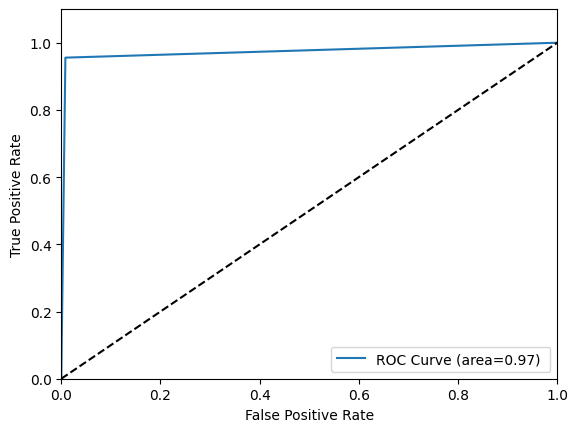

In [680]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [209]:
# passing the user data manually to check the prediction status of our model

user_data = np.array([[30153711, 28, 5, 27, 980, 625688, 5.2, -0.97, 6.23, 3, 5, 2021, 5, 7, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [211]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1, 4, 2021, 1, 7, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


In [212]:
# saving the classification model by using pickle

import pickle

with open('classification_model_fl.pkl', 'wb') as file:
    pickle.dump(model, file)

Model saved successfully

In [213]:
# load the pickle model to predict the status

with open('/Users/gokul/My Apple/vs_code_practice/copper_model/classification_model_fl.pkl', 'rb') as file:
    model = pickle.load(file)

user_data = np.array([[30235367, 81, 6, 11, 1498, 1667563287, 2.1, 3, 7.11, 1, 4, 2021, 2, 5, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


## Regression Method - Predict Selling Price

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [215]:
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons log,thickness log,selling price log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,30200854.0,25.0,1,5.0,41.0,1240.0,164141591,4.670802,-0.040822,6.400257,2,7,2020,6,8,2020
181618,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,6,8,2020
181619,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,7,8,2020
181620,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,6,8,2020


In [216]:
df_final.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons log', 'thickness log',
       'selling price log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [217]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def ml_regression(df, algorithm):
    
    x = df.drop(columns= ['selling price log'], axis= 1)
    y = df['selling price log']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train': r2_train,
                        'R2_test' : r2_test}
    
    return accuracy_metrics

In [218]:
print(ml_regression(df_final, DecisionTreeRegressor))
print(ml_regression(df_final, ExtraTreesRegressor))
print(ml_regression(df_final, RandomForestRegressor))
print(ml_regression(df_final, AdaBoostRegressor))
print(ml_regression(df_final, GradientBoostingRegressor))
print(ml_regression(df_final, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999325241489795, 'R2_test': 0.9294644922137519}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999325241489795, 'R2_test': 0.958057691459641}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9941366891262933, 'R2_test': 0.9601099992496258}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6456298927926682, 'R2_test': 0.6467235248465755}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8869335182666027, 'R2_test': 0.8872770441509303}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9528745366812963, 'R2_test': 0.9482390118204914}


In [219]:
# selecting RandomForestClassifier which has good interpretability.

In [220]:
x = df_final.drop(columns = ['selling price log'], axis = 1)
y = df_final['selling price log']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

param_grid_reg = {'max_depth'        : [2, 5, 10, 20],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf' : [1, 2, 4],
                  'max_features'     : ['sqrt', 'log2', None]}

grid_search_reg = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid_reg, cv = 5, n_jobs = -1)
grid_search_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [221]:
# best parameters from grid search

print(grid_search_reg.best_params_) 
grid_search_reg.best_score_

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


0.9534540932695592

In [222]:
# passing the best paramseters to check the accuracy for training, testing and overfitting

x = df_final.drop(columns = ['selling price log'], axis = 1)
y = df_final['selling price log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

model = RandomForestRegressor(max_depth = 20, max_features = None, min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.986436130745086, 0.9589258409675419)

In [223]:
# before hypertuning = 'RandomForestRegressor', 'R2_train': 0.9941366891262933, 'R2_test': 0.9601099992496258

# comparing both before and after hypertuning, reduced the overfitting in training

In [224]:
# calculating the mae, mse, rmse for the model

x = df_final.drop(columns = ['selling price log'], axis = 1)
y = df_final['selling price log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

model = RandomForestRegressor(max_depth = 20, max_features = None, min_samples_leaf = 1, min_samples_split = 2).fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

metrics_reg = {'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

metrics_reg

{'R2': 0.9588553607163511,
 'Mean Absolute Error': 0.031943553831693006,
 'Mean Squared Error': 0.0026969908600516356,
 'Root Mean Squared Error': 0.05193256069222502}

In [225]:
# manually passing the inputs to predict the selling price

# 30200854, 25, 1, 5,	41,	1240, 164141591, 4.7, -0.04, 2, 7, 2020, 8, 8, 2020
user_data = np.array([[302054,2, 1, 5,	41,	1240, 16411, 4, 0, 2, 7, 2023, 8, 8, 2020]])
y_pred = model.predict(user_data)
y_pred[0]

6.669894738865492

In [226]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

788.3126214143869

In [227]:
# saving the Regression model by using pickle

import pickle

with open('regression_model_fl.pkl', 'wb') as file:
    pickle.dump(model, file)

In [230]:
# load the pickle model to predict selling price

with open('/Users/gokul/My Apple/vs_code_practice/copper_model/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30217438, 25, 1, 5, 41, 1210, 1668701718, 6.6, -0.2, 1, 4, 2021, 6, 5, 2021]]))
np.exp(y_pred[0])

1041.066915957701

Getting unique values of each column

In [674]:
df['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [675]:
df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [676]:
df['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [677]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [679]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

Using these values, we will pass as user input to the model